PART 1: SELECT AND PREPARE DATA

In [69]:
#Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [70]:
#Import your data set
df = pd.read_csv('MoviesData.csv')

#Convert it into a Data Frame
#This is my initial Data Frame and I will make copies of this for calculations
df = pd.DataFrame(df)

#Understand your data set by printing all the columns
pd.set_option('display.max_columns', None)

#Delete the columns that are not needed
#Data Wrangling in-process
del df['ID']
del df['Unnamed: 0']

#Print first 5 rows and all the columns
#Sanity Check
print(df.shape)
print(df.head())

#Perfect

(16744, 15)
                            Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0                       Inception  2010  13+   8.8             87%        1   
1                      The Matrix  1999  18+   8.7             87%        1   
2          Avengers: Infinity War  2018  13+   8.5             84%        1   
3              Back to the Future  1985   7+   8.5             96%        1   
4  The Good, the Bad and the Ugly  1966  18+   8.8             97%        1   

   Hulu  Prime Video  Disney+  Type                       Directors  \
0     0            0        0     0               Christopher Nolan   
1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2     0            0        0     0         Anthony Russo,Joe Russo   
3     0            0        0     0                 Robert Zemeckis   
4     0            1        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventu

In [71]:
#Find and then fill in the missing values of your data set
print(df.info())

#Find the mean of the data points, you can use this to fill in missing values
print(df.mean())

#For items where you cannot calculate mean (e.g. Language), use "Other" or "All"

#Data Wrangling in-process
#Update age with the generic term "all"
df.update(df[['Age']].fillna('all'))

#Update IMDb with the average amount: 5.9
#I got 5.9 from the above calculation
df.update(df[['IMDb']].fillna(5.91))

#Update Rotten Tomatoes with the average amount, this is calculated later on in the Notebook
#It was complicated to calculate because of the % sign
df.update(df[['Rotten Tomatoes']].fillna('54.7%')) 

#Update Directors and Genres with the generic term "Others"
df.update(df[['Directors', 'Genres']].fillna('Others'))

#Update Country and Language with the generic term "Others"
df.update(df[['Country', 'Language']].fillna('Others'))

#Update Runtime with the average: 93
df.update(df[['Runtime']].fillna(93))

#Sanity Check
print(df.info())

#Perfect, now we have 16744 values for all parameters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.9+ MB
None
Year           2003.014035
IMDb           

PART 2: EXPLORATORY ANALYSIS

       Age  Hulu  Prime Video  Disney+  Netflix
0      13+     0            0        0        1
1      18+     0            0        0        1
2      13+     0            0        0        1
3       7+     0            0        0        1
4      18+     0            1        0        1
...    ...   ...          ...      ...      ...
16739  all     0            0        1        0
16740   7+     0            0        1        0
16741  all     0            0        1        0
16742  all     0            0        1        0
16743  all     0            0        1        0

[16744 rows x 5 columns]
     Hulu  Prime Video  Disney+  Netflix
Age                                     
13+   119          819       40      383
16+    17          226        1       89
18+   290         2612        3      752
7+    109          916      179      323
all   368         7781      341     2013
     Hulu  Prime Video  Disney+  Netflix
Age                                     
13+   119          819       

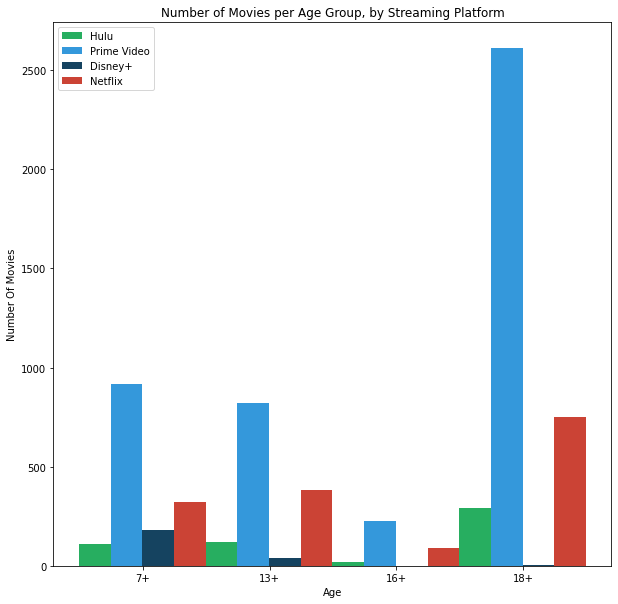

In [72]:
#Question 1, follow-up: Which streaming platform is best for which age group (children)?
#The platform t
df1 = df.copy()
df1 = df1[["Age","Hulu","Prime Video","Disney+","Netflix"]]
print(df1)

#Group the data by age, so that you can see how many movies are avaliable for each age group
#Them sum it up
df1 = df1.groupby('Age').sum()
df11 = pd.DataFrame(df1)
print(df11)

#Remove the last column "All" because it is not needed and generic for the analysis 
df11 = df11.iloc[0:4,:]
print(df11)

#Change the order of the data so its in ascending order
df11 = df11.reindex(['7+', '13+', '16+', '18+'])
print(df11)

#Get the values of the index to use it for the X-axis later on
x11 = df11.index.get_level_values("Age")

#Add bars for the 4 Platforms
bar1 = df11['Hulu']
bar2 = df11['Prime Video']
bar3 = df11['Disney+']
bar4 = df11['Netflix']

#Set X-coordinates 
p1 = np.arange(len(bar1+1))
p2 = [y + 0.25 for y in p1]
p3 = [y + 0.25 for y in p2]
p4 = [y + 0.25 for y in p3]
p5 = [y + 0.25 for y in p4]


# Make the plot
#I used colors that are consistent with the streaming platform's colors
fig = plt.figure(figsize=(10,10))
plt.bar(p1, bar1, color='#27AE60', width=0.25, label='Hulu')
plt.bar(p2, bar2, color='#3498DB', width=0.25, label='Prime Video')
plt.bar(p3, bar3, color='#154360', width=0.25, label='Disney+')
plt.bar(p4, bar4, color='#CB4335', width=0.25, label='Netflix')
 
#Add your labels
plt.xlabel('Age')
plt.ylabel('Number Of Movies')
plt.title("Number of Movies per Age Group, by Streaming Platform")
#I played around to find the optimal number, 0.38 for the labels
plt.xticks([x + 0.38 for x in range(len(bar1))], ["7+","13+","16+","18+"])

 
# Create legend
plt.legend()

#Show your graph
plt.show()


       Age  Hulu  Disney+  Netflix
0      13+     0        0        1
1      18+     0        0        1
2      13+     0        0        1
3       7+     0        0        1
4      18+     0        0        1
...    ...   ...      ...      ...
16739  all     0        1        0
16740   7+     0        1        0
16741  all     0        1        0
16742  all     0        1        0
16743  all     0        1        0

[16744 rows x 4 columns]
     Hulu  Disney+  Netflix
Age                        
13+   119       40      383
16+    17        1       89
18+   290        3      752
7+    109      179      323
all   368      341     2013
     Hulu  Disney+  Netflix
Age                        
13+   119       40      383
16+    17        1       89
18+   290        3      752
7+    109      179      323
     Hulu  Disney+  Netflix
Age                        
7+    109      179      323
13+   119       40      383
16+    17        1       89
18+   290        3      752


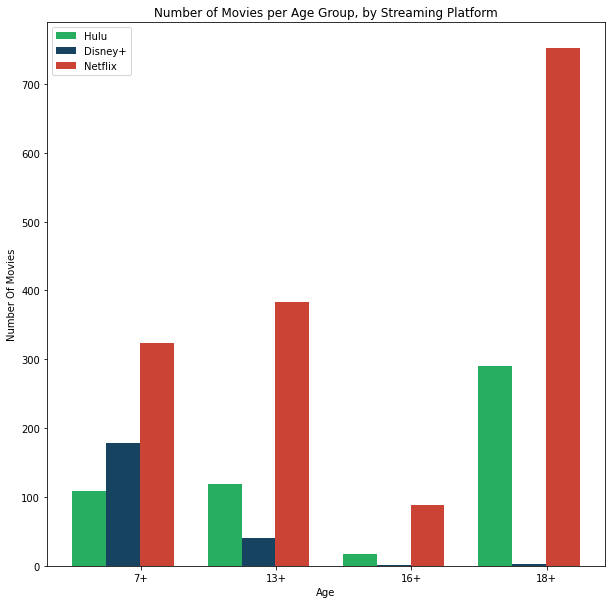

In [73]:
#We can see that Prime Video has the most number of movies for all the ages
#Therefore, take-out prime video to see the next best category
#Question 1, follow-up: Which streaming platform is best for which age group (children)?
#The platform t
df1 = df.copy()
df1 = df1[["Age","Hulu","Disney+","Netflix"]]
print(df1)

#Group the data by age, so that you can see how many movies are avaliable for each age group
df1 = df1.groupby('Age').sum()
df11 = pd.DataFrame(df1)
print(df11)

#Remove the last column "All" because it is generic 
df11 = df11.iloc[0:4,:]
print(df11)

#Change the order of the data so its in ascending order
df11 = df11.reindex(['7+', '13+', '16+', '18+'])
print(df11)

x11 = df11.index.get_level_values("Age")

bar1 = df11['Hulu']
bar3 = df11['Disney+']
bar4 = df11['Netflix']

#Set x-coordinates 
p1 = np.arange(len(bar1+1))
pp3 = [y + 0.25 for y in p1]
pp4 = [y + 0.25 for y in p2]

# Make the plot
fig = plt.figure(figsize=(10,10))
plt.bar(p1, bar1, color='#27AE60', width=0.25, label='Hulu')
plt.bar(pp3, bar3, color='#154360', width=0.25, label='Disney+')
plt.bar(pp4, bar4, color='#CB4335', width=0.25, label='Netflix')
 
#Add your labels
plt.xlabel('Age')
plt.ylabel('Number Of Movies')
plt.xticks([x + 0.38 for x in range(len(bar1))], ["7+","13+","16+","18+"])
plt.title("Number of Movies per Age Group, by Streaming Platform")

 
# Create legend
plt.legend()

#Show your graph
plt.show()



In [74]:
#Follow-up to Question 1: 
#Although Amazon Prime has the most movies, which platform has the highest ranked movies?
#This will help us see if quantity does or does not equal quality

df0 = df.copy()

#Only include to columns you need to make it easier
df0 = df0[["IMDb","Prime Video","Disney+","Netflix","Hulu"]]
print(df0)

#Take the average IMDB rating for each Platform
dfP = df0[["IMDb","Prime Video"]]

#0 means 0 movies in the system
#So to only take into account the 1, put the parameter > 0
dfP = dfP[dfP['Prime Video']>0]

#Save the value so you can use it in your graph
avgP = dfP[["IMDb"]].mean()
print(avgP)

dfD = df0[["IMDb","Disney+"]]
dfD = dfD[dfD['Disney+']>0]
avgD = dfD["IMDb"].mean()
print(avgD)

dfN = df0[["IMDb","Netflix"]]
dfN = dfN[dfN['Netflix']>0]
avgN = dfN["IMDb"].mean()
print(avgN)

dfH = df0[["IMDb","Hulu"]]
dfH = dfH[dfH['Hulu']>0]
avgH = dfH["IMDb"].mean()
print(avgH)


       IMDb  Prime Video  Disney+  Netflix  Hulu
0      8.80            0        0        1     0
1      8.70            0        0        1     0
2      8.50            0        0        1     0
3      8.50            0        0        1     0
4      8.80            1        0        1     0
...     ...          ...      ...      ...   ...
16739  6.20            0        1        0     0
16740  4.70            0        1        0     0
16741  5.70            0        1        0     0
16742  6.60            0        1        0     0
16743  5.91            0        1        0     0

[16744 rows x 5 columns]
IMDb    5.775932
dtype: float64
6.440443262411343
6.241595505617977
6.135337763012181


/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:256: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



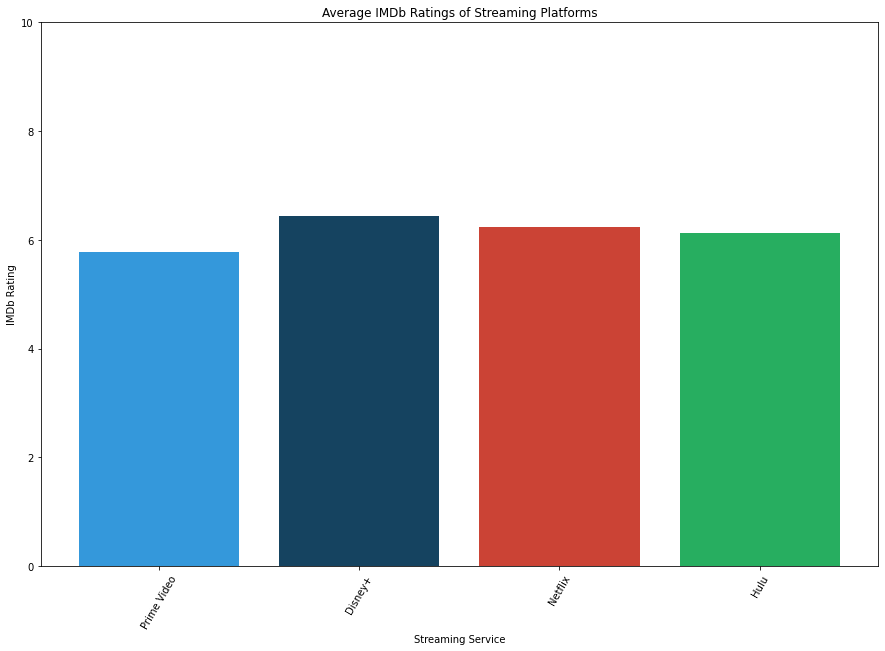

In [75]:
#Now plot this on a graph
#X-axis is the streaming servicr, and Y-axis is the Rating

#Set figure size
fig3 = plt.figure(figsize=(15,10))

#Add X-axis labels
stream = ["Prime Video","Disney+","Netflix","Hulu"]
avgRate = [avgP, avgD, avgN, avgH]
plt.bar(stream, avgRate, color = ["#3498DB","#154360","#CB4335","#27AE60"])
plt.xticks(rotation=60)
plt.xlabel('Streaming Service')
plt.ylabel('IMDb Rating')

#Set the IMDb limit to make sure to not distort the data
plt.ylim(0,10)
plt.title('Average IMDb Ratings of Streaming Platforms')
plt.show()

#This shows us that even though Prime Video has more movies, the other streaming platforms have more "quality" ones
#Because they are ranked higher according to IMDb
#However, it is such a small difference that it can be ignored for most people. 


<class 'numpy.ndarray'>
[   1    1    2    4    1    1    3    2    5    4    8    4    1    6
    3    2    3    6   12   20   28   36   34   40   46   55   36   38
   40   47   50   51   39   36   36   33   35   28   27   28   31   52
   38   28   36   44   35   46   36   40   36   32   39   37   29   47
   34   50   47   82   88   77   83   68   88   85   86   84   75   74
   73   60   65   69   82   96   99   93   73   88   77   78  103  110
  110  117  136  150  176  162  200  219  225  293  346  382  456  566
  553  677  877 1001 1015 1108 1253 1478 1359  727  150]
109
109
      Number of Movies
Year                  
1902                 1
1912                 1
1913                 2
1915                 4
1916                 1
...                ...
2016              1253
2017              1478
2018              1359
2019               727
2020               150

[109 rows x 1 columns]


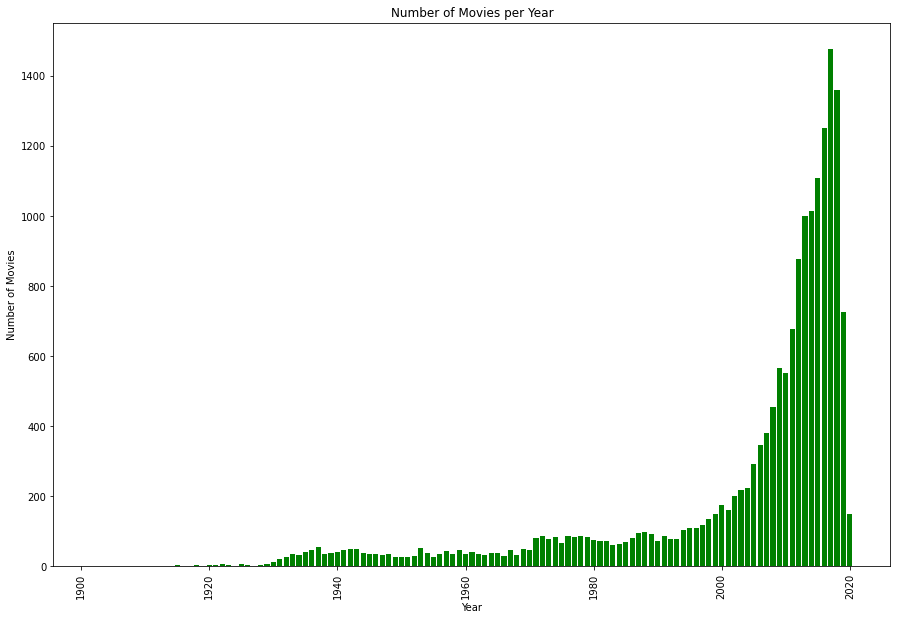

In [76]:
#Hypothesis 2: Over time, are ratings becoming more critical and negative? 
#Has the number of movies being produced each year has been increasing?
dfNumber = df.copy()
dfNumber = dfNumber[["Year","Netflix","Hulu","Disney+","Prime Video"]]

#Sum the number of movies on each platform
sumN = dfNumber["Netflix"].sum()
sumH = dfNumber["Hulu"].sum()
sumD = dfNumber["Disney+"].sum()
sumP = dfNumber["Prime Video"].sum()

#Next, sum all the movies per year by using "group.by" function
dfNumber1 = dfNumber.groupby("Year").sum()

#Convert it to NumPy so you can easily work with the numbers
dfNumberNum = dfNumber1.to_numpy()

#Sanity check
print(type(dfNumberNum))
#print(dfNumberNum)

#Sum up all the rows of the numpy, use axis = 1
movieYear = dfNumberNum.sum(axis=1)
print(movieYear)

#Sanity check - there is 109 years
print(len(movieYear))

#Sanity Check - Perfect. Both are equal to 109 
print(len(dfNumber1))

#Remove the unecessary columns 
del dfNumber1["Netflix"]
del dfNumber1["Hulu"]
del dfNumber1["Disney+"]
del dfNumber1["Prime Video"]

#Now add the sum of the movies to the df
dfNumber1["Number of Movies"] = movieYear
print(dfNumber1)
#Perfect - it works!

#Create a bar graph
xY = dfNumber1.index.get_level_values("Year")
yN = dfNumber1["Number of Movies"]

fig3 = plt.figure(figsize=(15,10))
plt.bar(xY, yN, color="g")
plt.ylabel("Number of Movies")
plt.xlabel("Year")
plt.title('Number of Movies per Year')

plt.tick_params(axis='x',labelrotation=90)

#Show the final result
plt.show()

#Exponential production of movies


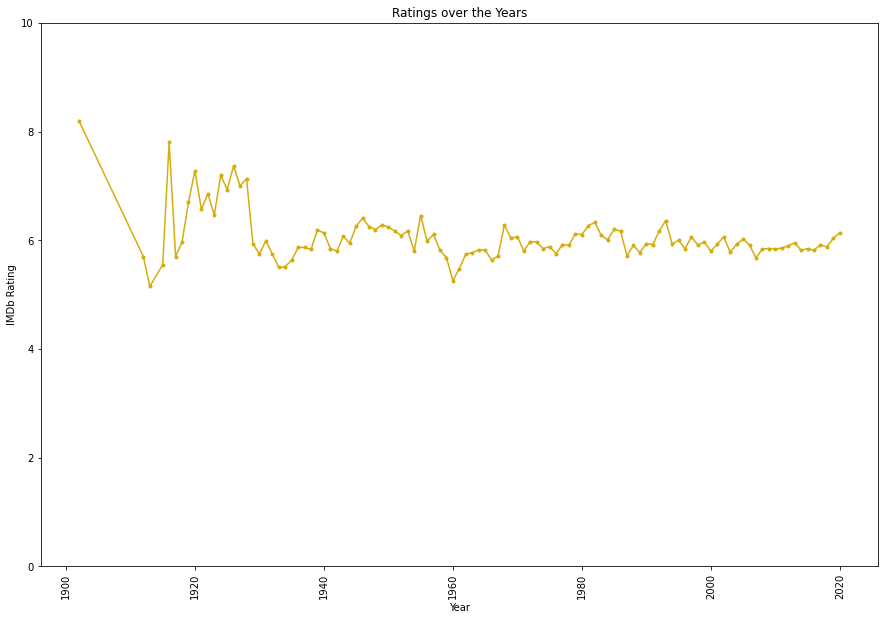

In [77]:
import plotly.express as px
#Sub-question: Let us check whether the quality of movies (Ratings) have improved or worsened over time
#Copy DataFrame
df2 = df.copy()
df2 = df2[["Title", "Year", "IMDb"]]

#Take an average of all the ratings by year
df2 = df2.groupby('Year').mean()

#Make the plot
fig2 = plt.figure(figsize = (15,10))

#Get the values for the X axis
x2 = df2.index.get_level_values("Year")

#Plot the parameters for Y
y2 = df2["IMDb"]

#Label the charts
plt.ylabel("IMDb Rating")
plt.xlabel("Year")
plt.title('Ratings over the Years')
plt.ylim(0,10)
plt.tick_params(axis='x',labelrotation=90)

#Use a line-chart as this is over time
plt.plot(x2, y2, marker='o',markersize=3, color="#D4AC0D")
plt.show()


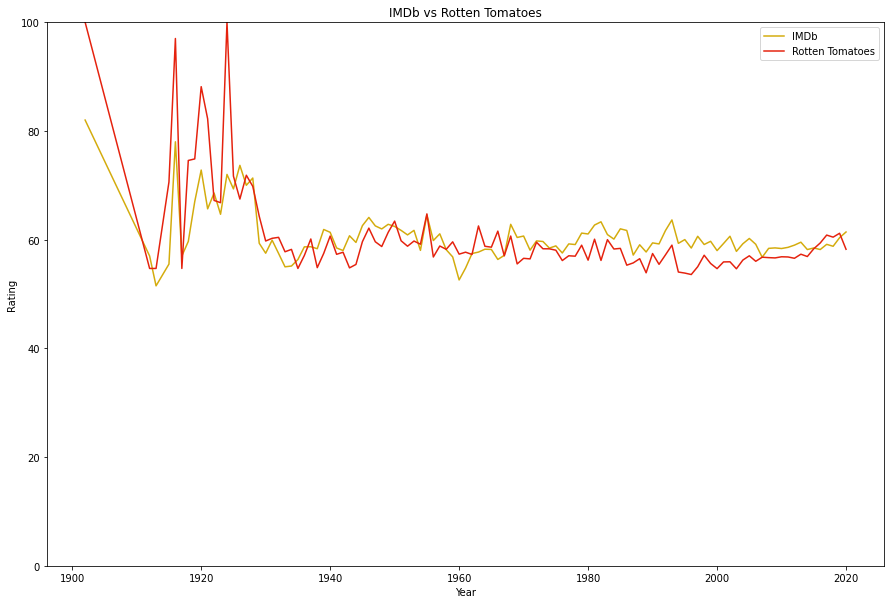

In [78]:
#In general, are IMDB or Rotten Tomatoes ratings more positive?
df4 = df.copy()
df4 = df4[["Title", "Year","IMDb","Rotten Tomatoes",]]

#We first have to convert the Rotten Tomatoes rating to a number
#It is currently in % format
df4['Rotten Tomatoes'] = list(map(lambda x: x[:-1], df4['Rotten Tomatoes'].values))
df4['Rotten Tomatoes'] = [float(x) for x in df4['Rotten Tomatoes'].values]
 
#print(df4["Rotten Tomatoes"].mean()), answer is 54.7
#54.7 is used in the beginning to fill in Rotten Tomatoes Mean Fill-in value

#To convert it to the same metric as Rotten Tomatoes, x10
df4['IMDb'] = df.IMDb * 10 

#Group by the year to get the average for each year
df4 = df4.groupby('Year').mean()
df4 = pd.DataFrame(df4)

#print(df4.head()) #Sanity Check

#Create line for IMDb
x4 = df4.index.get_level_values('Year')
y4 = df4['IMDb']

#Create line for Rotten Tomatoes
fig3 = plt.figure(figsize = (15,10))
plt.plot(x4, y4, label = "IMDb", color="#D4AC0D")

x44 = df4.index.get_level_values('Year')
y44 = df4['Rotten Tomatoes']

plt.plot(x44, y44, label = "Rotten Tomatoes", color="#E5220E")
plt.xlabel('Year')
plt.ylabel('Rating')
plt.ylim((0,100))
plt.title('IMDb vs Rotten Tomatoes')
plt.legend()

plt.show()

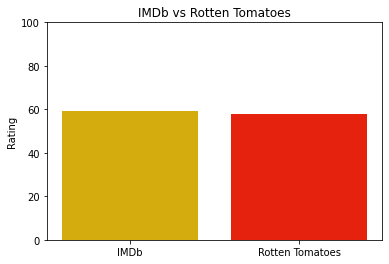

In [79]:
#To just compare which ratings are more positive, take the average of all the ratings for all movies, all years
#To confirm my previous founding
df4 = df.copy()
df4 = df4[["IMDb","Rotten Tomatoes"]]

#Same Code as above - explained already
df4['Rotten Tomatoes'] = list(map(lambda x: x[:-1], df4['Rotten Tomatoes'].values))
df4['Rotten Tomatoes'] = [float(x) for x in df4['Rotten Tomatoes'].values]

df4['IMDb'] = df.IMDb * 10 

barI = df4['IMDb'].mean()
barR = df4['Rotten Tomatoes'].mean()

xAxis = ["IMDb","Rotten Tomatoes"]
yAxis = [barI, barR]
plt.ylim(0,100)
plt.ylabel('Rating')
plt.ylim((0,100))
plt.title('IMDb vs Rotten Tomatoes')

plt.bar(xAxis, yAxis, color=["#D4AC0D","#E5220E"])
plt.show()

#As you can see IMDb ratings are only VERY slighly more positive than Rotten Tomatoes
#Therefore, the ratings are pretty similar

   IMDb                            Genres
0   8.8  Action,Adventure,Sci-Fi,Thriller
1   8.7                     Action,Sci-Fi
2   8.5           Action,Adventure,Sci-Fi
3   8.5           Adventure,Comedy,Sci-Fi
4   8.8                           Western
          index  Number of Movies
7         Drama              7227
4        Comedy              4637
25     Thriller              3354
0        Action              2683
6   Documentary              2546
20      Romance              2359
13       Horror              2201
5         Crime              1833
1     Adventure              1778
8        Family              1514
16      Mystery              1274
21       Sci-Fi              1228
9       Fantasy              1089
3     Biography               821
12      History               715
2     Animation               711
14        Music               667
26          War               539
27      Western               499
23        Sport               404
15      Musical               401


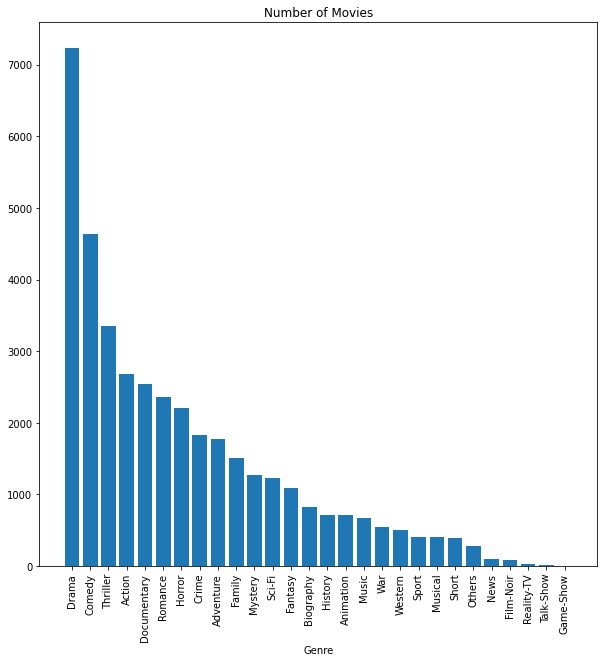

In [80]:
#Question 3: What are the metrics of the most commonly produced movies?
#For instance, what are most movies Genere, Run time, language, country they are produced in. 
dfGenre = df.copy()
dfGenre = dfGenre[["IMDb","Genres"]]
print(dfGenre.head())

def seperate(data,column):
    r = data[column].str.get_dummies(',')
    return r

genreOne = seperate(dfGenre,'Genres')

#print(genreOne.head())
#print(len(genreOne)) #Correct
#print(genreOne)

gen2 = genreOne.sum()

gen2 = pd.DataFrame(gen2)
gen2.columns = ["Number of Movies"]
gen2.reset_index(level=0, inplace=True)
gen2 = gen2.sort_values(by=["Number of Movies"], ascending=False)
print(gen2) #Check

xGen = gen2["index"]
yNum = gen2["Number of Movies"]

figureBar = plt.figure(figsize=(10,10))
plt.bar(xGen,yNum)
plt.xlabel("Genre")
plt.title('Number of Movies')
plt.tick_params(axis='x',labelrotation=90)
plt.show()

In [81]:
print(gen2)

          index  Number of Movies
7         Drama              7227
4        Comedy              4637
25     Thriller              3354
0        Action              2683
6   Documentary              2546
20      Romance              2359
13       Horror              2201
5         Crime              1833
1     Adventure              1778
8        Family              1514
16      Mystery              1274
21       Sci-Fi              1228
9       Fantasy              1089
3     Biography               821
12      History               715
2     Animation               711
14        Music               667
26          War               539
27      Western               499
23        Sport               404
15      Musical               401
22        Short               386
18       Others               275
17         News               105
10    Film-Noir                79
19   Reality-TV                22
24    Talk-Show                19
11    Game-Show                 7


         Runtime
IMDb            
0.0    54.250000
1.0    67.500000
1.3    71.000000
1.4    82.250000
1.5    82.500000
...          ...
8.8    92.857143
8.9    92.818182
9.0   100.666667
9.1   109.000000
9.3    82.333333

[83 rows x 1 columns]
92.35162094763092


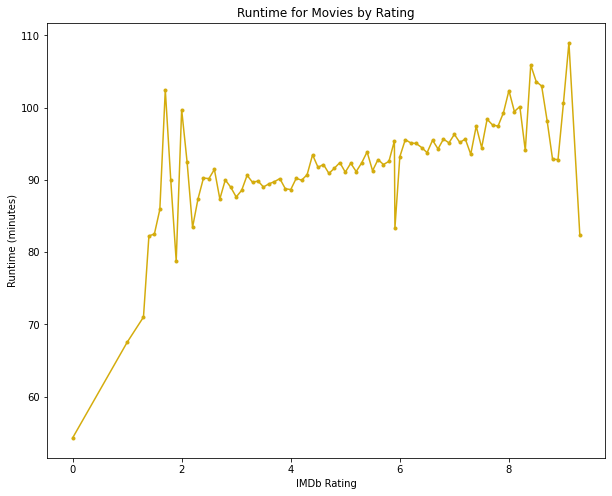

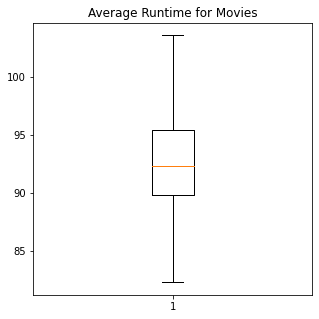

In [91]:
#Question 3: 
#Sub-questiom 2: What is the average runtime for most movies? 

df3 = df.copy()
df3 = df3[["IMDb","Runtime"]]

df3 = df3.groupby('IMDb').mean()
df6 = pd.DataFrame(df3)
print(df6)

xRating = df6.index.get_level_values("IMDb")
yRun = df6["Runtime"]

runNum = df6["Runtime"].to_numpy()
#Get the mean using numpy
run = np.percentile(runNum, 50)
print(run)


fig22 = plt.figure(figsize=(10,8))
plt.plot(xRating, yRun, marker='o',markersize=3, color="#D4AC0D")
plt.xlabel('IMDb Rating')
plt.ylabel('Runtime (minutes)')
plt.title('Runtime for Movies by Rating')
plt.show()

figBox1 = plt.figure(figsize=(5,5))
plt.boxplot(df3["Runtime"],showfliers=False)
plt.title("Average Runtime for Movies")
plt.show()

#It seems like higher ranked movies usually have a higher Runtime than lower ranked one's. 
#Do Box-Whishker plot 

95.65975492574516 99.34774844720496 94.47794330734133


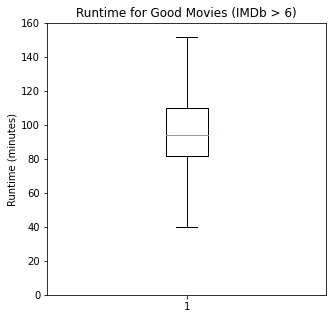

In [94]:
#Question 3: 
#Sub-questiom 2: What is the optimal runtime for movies? 
#Helps us understand what length "good" movies are
#Take the average of movies rated above a 6

df3 = df.copy()
df3 = df3[["IMDb","Runtime"]]
df3 = df3[df3['IMDb']>6.0]

df66 = df3.groupby('IMDb').mean()
df66 = pd.DataFrame(df66)

xRating2 = df66.index.get_level_values("IMDb")
yRun2 = df66["Runtime"]

runNum1 = df66["Runtime"].to_numpy()
run1 = np.percentile(runNum1, 50)
run2 = np.percentile(runNum1, 75)
run3 = np.percentile(runNum1, 25)
print(run1, run2, run3)


figBox = plt.figure(figsize=(5,5))
plt.boxplot(df3["Runtime"],showfliers=False)
plt.title('Runtime for Good Movies (IMDb > 6)')
plt.ylabel('Runtime (minutes)')
plt.ylim(0,160)
plt.show()

             index  Number of Movies
0    United States             10486
1   United Kingdom              1713
2            India              1157
3           Canada              1117
4           France               741
5          Germany               498
7            Italy               417
8            Spain               329
9        Australia               321
10       Hong Kong               269


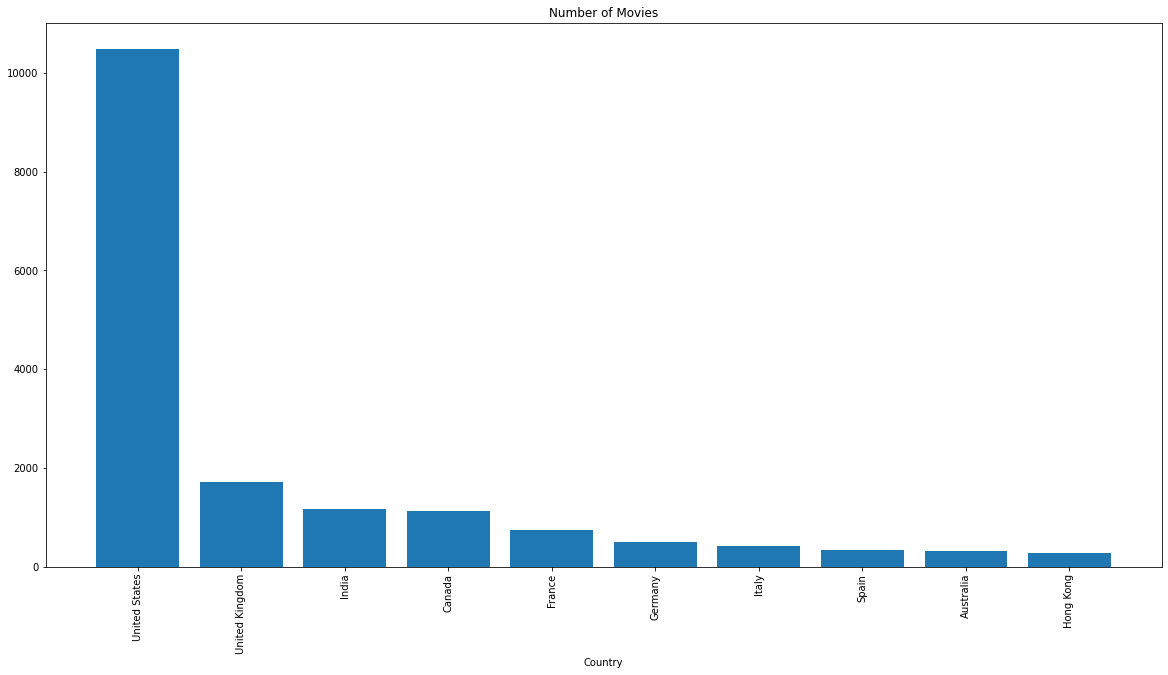

In [84]:
#Question 3: 
#Sub-questiom 4: What are the top 10 countries that produce movies?
df10 = df.copy()
df10 = df10[["IMDb","Country"]]
#print(df10)

def sep(data,column):
    r = data[column].str.get_dummies(',')
    return r

country1 = sep(df10,'Country')
#print(country1)

country2 = country1.sum()
country2 = pd.DataFrame(country2)
country2.columns = ["Number of Movies"]
country2.reset_index(level=0, inplace=True)

#Remove countries that have not produced movies
country3 = country2[country2["Number of Movies"]>0]

country33 = country3.sort_values(by=["Number of Movies"], ascending=False)
#print(country33)

#Reset index to easily delete "Others" later on
country4 = country33.reset_index()
#Not needed column
del country4["level_0"]

country44 = country4.head(11)
#Drop "Others" as its a generic column that will not help us analyze the data
country44 = country44.drop(country44.index[6])
print(country44)

xGen1 = country44["index"]
yNum1 = country44["Number of Movies"]

figureBar = plt.figure(figsize=(20,10))
plt.bar(xGen1,yNum1)
plt.xlabel("Country")
plt.title('Number of Movies')
plt.tick_params(axis='x',labelrotation=90)
plt.show()

In [85]:
#Question 4: What are the top 5 movies to watch at a Kid's birthday party?
#Pick the highest ranked movie that is 7+ 

dfFav = df.copy()
dfFav = dfFav[["IMDb","Age","Title"]]
dfFav = dfFav[dfFav["Age"]=="7+"]

#Sort by IMDb rating so you can pick the top Movies
dfFav1 = dfFav.sort_values(by="IMDb",ascending=False)

print(dfFav1.head(5))

#It is unfair to include some 8.6 movies, but exclude others.
#Therefore, add all the movies that are above or equal to 8.3

topMovies = dfFav1[dfFav1["IMDb"]>=8.6]
#print(topMovies)

#Delete Age column as its not needed
del topMovies["Age"]

#This gives us the top 6 Movies
#Sanity Check - To make sure that the 7th movie is < 8.6
#print(dfFav1.head(7))
#Correct, because the 7th movie is 8.5 only

#Graph the top movies

topMovies = topMovies.set_index(topMovies["Title"])
del topMovies["Title"]

print(topMovies)



       IMDb Age                               Title
1458    8.7  7+                     Untamed Romania
16213   8.7  7+  Star Wars: The Empire Strikes Back
4439    8.6  7+               It's a Wonderful Life
16212   8.6  7+               Star Wars: A New Hope
10384   8.6  7+                        Slednecks 13
                                    IMDb
Title                                   
Untamed Romania                      8.7
Star Wars: The Empire Strikes Back   8.7
It's a Wonderful Life                8.6
Star Wars: A New Hope                8.6
Slednecks 13                         8.6
Fabulous Frogs                       8.6


                                    Hulu  Netflix  Prime Video  Disney+  IMDb
Title                                                                        
Fabulous Frogs                         0        0            1        0   8.6
It's a Wonderful Life                  0        0            1        0   8.6
Slednecks 13                           0        0            1        0   8.6
Star Wars: A New Hope                  0        0            0        1   8.6
Star Wars: The Empire Strikes Back     0        0            0        1   8.7
Untamed Romania                        0        1            1        0   8.7


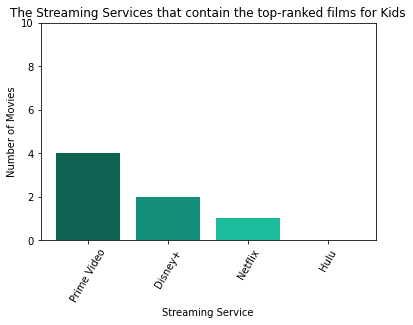

In [86]:
#Which platform should they use their free rental on
dfStream = df.copy()
dfStream = dfStream[["Title","Hulu","Netflix","Prime Video","Disney+","Age","IMDb"]]
dfStream1 = dfStream[dfStream["Age"]=="7+"]
dfStream2 = dfStream1.sort_values(by="IMDb",ascending=False)
top = dfStream2[dfStream2["IMDb"]>=8.6]

top = top.groupby("Title").sum()
print(top) #This lets us know which movie is in which platform in a neat manner


plat = ["Prime Video","Disney+","Netflix","Hulu"]
avgRate = [4, 2, 1, 0]
plt.bar(stream, avgRate, color = ["#0E6251","#148F77","#1ABC9C","#76D7C4"])
plt.xticks(rotation=60)
plt.xlabel('Streaming Service')
plt.ylabel('Number of Movies')
plt.ylim(0,10)
plt.title('The Streaming Services that contain the top-ranked films for Kids')
plt.show()